In [1]:
from pathlib import Path
from IPython.display import Image

from data_utils import load_params, load_results, convert_test_scores_to_sample_scores
from eval import calculate_cf_matrix, plot_cf_matrix, plot_negative_roc
import yaml

# Load data

In [7]:
# import parameters
params_path = Path('./params.yml')
import_params = load_params(params_path, 'import_params')

# import results.txt file and extract information from file names 
df_results_image_based = load_results(import_params.import_file_path, import_params)
df_results_image_based

image_name category sample  \
0     /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
1     /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
2     /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
3     /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
4     /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
...                                                 ...      ...    ...   
1467  /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
1468  /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
1469  /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
1470  /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   
1471  /home/tonytrieu/datasets/Cilag/C31/C31_Vorstud...      NaN    NaN   

     revolution trigger  negative_score  prediction  truth  
0           NaN     NaN    1.466964e-07           0      0  
1           NaN     NaN    2.849430e-03           0      0  
2           NaN     NaN    2.953730e-03           0      0  
3           NaN     NaN    9.999891e-01           1      1  
4           NaN     NaN    9.834958e-01           1      1  
...         ...     ...             ...         ...    ...  
1467        NaN     NaN    4.496892e-06           0      0  
1468        NaN     NaN    1.219636e-06           0      0  
1469        NaN     NaN    3.506622e-06           0      0  
1470        NaN     NaN    7.791247e-05           0      0  
1471        NaN     NaN    9.934455e-01           1      1  

[1472 rows x 8 columns]

# Filter categories and save data frame

In [8]:
# filter relevant categories
include_categories = [
    'Airline',
    'Verformt',
    'BeschStopfen_',
    'MarkStopfen_',
    'PartikelIglo_',
    'FaserStopfen',
    'LyoStopfen',
    'Gut'
]

with open(params_path, 'r') as file:
    params = yaml.safe_load(file)
    export_params = params['export_params']

# df_results_image_based = df_results_image_based[df_results_image_based.category.isin(include_categories)]

# save new data frame to csv file
path_image_based_csv = export_params['export_path'] + r'\image_based_scores.csv'
df_results_image_based.to_csv(path_image_based_csv)

# Image-based evaluation

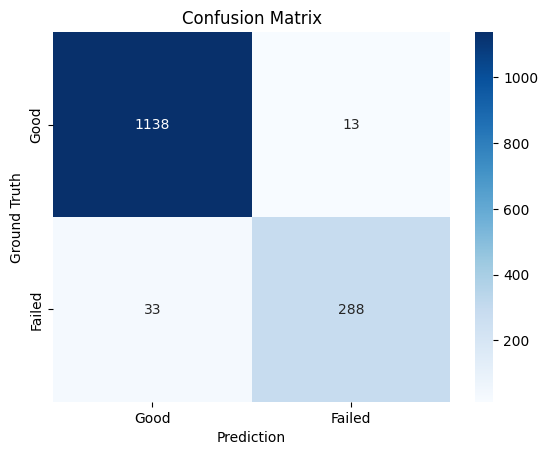

In [9]:
# evaluation parameters
prediction_class_to_value_map = {'Good': 0, 'Failed': 1}
prediction_classes = ['Good', 'Failed']

# creating confusion matrix
y_true = df_results_image_based.truth
y_pred = df_results_image_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
export_path = Path(export_params['export_path'])
save_path_cf_matrix = export_path / 'image_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

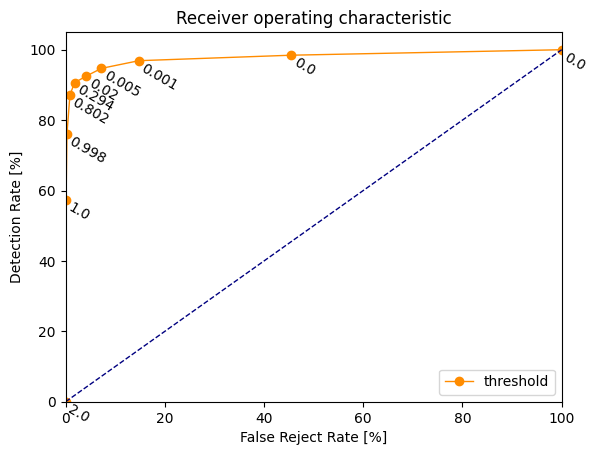

In [10]:
# plotting and saving ROC curve
y_scores = df_results_image_based.negative_score
save_path_ROC_curve = export_path / 'image_based_ROC_curve.png'

plot_negative_roc(y_true, y_scores, save_path_ROC_curve, n = 10, negative_label=1)

# Sample-based evaluation

In [11]:
df_results_sample_based = convert_test_scores_to_sample_scores(df_results_image_based)
df_results_sample_based

Empty DataFrame
Columns: [negative_score, prediction, truth]
Index: []

In [12]:
# save sample based data frame to csv file
save_path_sample_based_csv= export_path / 'sample_based_test_scores.csv'
df_results_sample_based.to_csv(save_path_sample_based_csv)

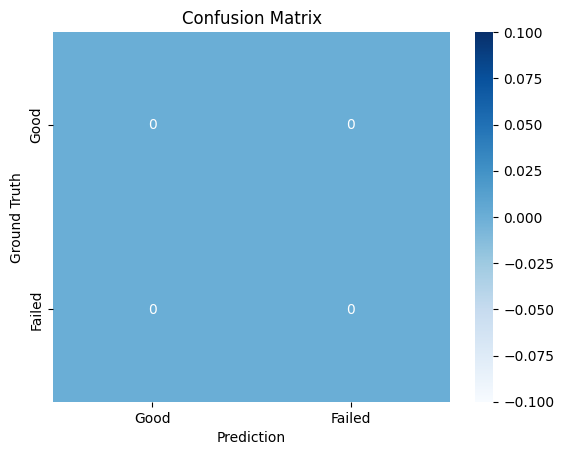

In [13]:
# creating confusion matrix
y_true = df_results_sample_based.truth
y_pred = df_results_sample_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
save_path_cf_matrix = export_path / 'sample_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

In [14]:
# plotting and saving ROC curve
y_scores = df_results_sample_based.negative_score
save_path_ROC_curve = export_path / 'sample_based_ROC_curve.png'

plot_negative_roc(y_true, y_scores, save_path_ROC_curve, n = 5, negative_label=1)

IndexError: cannot do a non-empty take from an empty axes.